<a href="https://colab.research.google.com/github/Rukhsar7/nlp_assignment_2_gul/blob/main/The__Nlp_assignment_2_gul_ucse19007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Gule Rukhsar

---


UCSE19007

---


B.tech 4th year [ 7TH SEM ]

---


Professor : Dr. Sourav Mondal

---


XIM UNIVERSITY

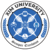

**Step 1 :** Connecting {Mounting} with the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2:** Data Preprocessing - As we are dealing with the text data, we need to pre-process it using word embeddings.

In [2]:
import pandas as pd

path = "/content/drive/MyDrive/nlp/comments.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


**Step 3:** We only need the text and sentiment column.

In [5]:
df.shape

(38932, 5)

In the above result ,we observe that there are more than 14,000 data samples in the sentiment analysis dataset

**Step 4**:Checking the column names.

In [6]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

**Step 5:** Getting to know all the info about the data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


**Step 6:** Checking the transpose.

**Note:** When every value of the pandas data structure needs to be transposed in some specific manner then the pandas.transpose() function can be used. The word transpose means the process of exchanging places. same as the word means the transpose() method in pandas is used for interchanging the axes. the process of interchanging the axes means all column values in the dataframe will get depicted as rows and all rows in the dataframe will be reflected as columns. this interchanging process is named as transpose.

In [10]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


**Data Cleaning / EDA starts here**

**Step 7:** Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns.

In [11]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


**Step 8:** Checking for the Distribution of Default.

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


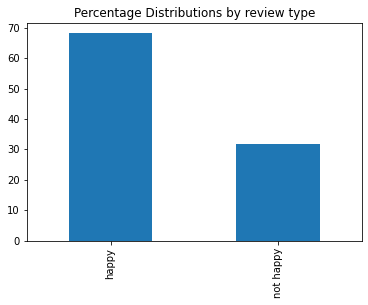

In [12]:

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

**Step 9:** Removing columns

In [13]:

df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)


**Step 10:**  Applying first level cleaning



In [14]:

import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

**Step 11:** Now Let's take a look at the updated text.

In [15]:

df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


**Step 12**: Now - Again we will apply a second round of cleaning

In [16]:

def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)




**Step 13:** Now Let's take a look at the updated text


In [18]:
# Let's take a look at the updated text
df['cleaned_description_new'] = pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


**Step 14 : Model training starts here:-**



In [19]:
from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_description_new
Dependent_var = df.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


**Step 15:** Using pipeline

**Note:** The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [21]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2418,  305],
       [ 153, 1018]])

**Step 16**: In the final step we will see the model prediciton

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


**Step 17: **Trying the model on new reviews.

In [25]:
example = ["I'm not happy"]
result = model.predict(example)

print(result)

['happy']


**Therefore , In the above Sentiment Analysis done we get our output results for the Hotel reviews**